<a href="https://colab.research.google.com/github/Israelamat/Study-and-prediction-of-U.S.-contamination/blob/main/Proyecto_Final_IA_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Por qué es relevante estudiar la contaminación del aire y predecirla

La contaminación atmosférica es uno de los principales problemas medioambientales y de salud pública a nivel mundial. Según la Organización Mundial de la Salud (OMS), más del 90% de la población mundial respira aire contaminado, lo que contribuye a más de 7 millones de muertes prematuras al año (OMS, 2018).

En Estados Unidos, a pesar de las políticas regulatorias como la Clean Air Act, todavía existen numerosas regiones que exceden los estándares de calidad del aire, especialmente en áreas urbanas e industriales. La exposición prolongada a contaminantes como el dióxido de nitrógeno (NO₂), ozono (O₃), dióxido de azufre (SO₂) y monóxido de carbono (CO) está asociada a enfermedades respiratorias, cardiovasculares y aumento de hospitalizaciones (EPA, 2021).

Dada la importancia de monitorear y controlar estos contaminantes, surge la necesidad de desarrollar modelos predictivos que permitan anticipar los niveles de contaminación en el futuro. Un modelo de este tipo no solo ayuda a comprender las dinámicas de la calidad del aire, sino que también puede servir como herramienta de apoyo para:

Activar alertas tempranas ante posibles episodios de contaminación grave.

Ayudar a planificar políticas públicas y medidas de mitigación.

Informar a la población vulnerable (niños, ancianos, personas con asma).

Además, el análisis de los datos históricos de contaminación permite explorar la evolución de la calidad del aire a lo largo del tiempo y evaluar si las tendencias actuales son sostenibles o si, por el contrario, seguimos en una trayectoria que podría empeorar los niveles de contaminación en el futuro.

Por tanto, este proyecto tiene como objetivo desarrollar un modelo de predicción de la calidad del aire, utilizando un dataset real de contaminación en Estados Unidos que incluye medidas de cuatro contaminantes principales en distintas localizaciones, fechas y horarios. Este análisis permitirá no solo predecir valores futuros, sino también identificar factores clave que influyen en los niveles de contaminación y aportar una visión sobre el posible impacto de mantener las mismas condiciones en los próximos años.

El estudio de la contaminación del aire a través de técnicas de machine learning es un área activa de investigación (Zhang et al., 2012; Wang & Chen, 2018) y puede proporcionar soluciones complementarias a los sistemas tradicionales de monitoreo mediante modelos estadísticos.

# Bibliografía:

Organización Mundial de la Salud (2018). Ambient air pollution: Health impacts. https://www.who.int/airpollution

United States Environmental Protection Agency (EPA) (2021). Air Quality Trends. https://www.epa.gov/air-trends

Zhang, Y., Bocquet, M., Mallet, V., Seigneur, C., & Baklanov, A. (2012). Real-time air quality forecasting, part I: History, techniques, and current status. Atmospheric Environment, 60, 632-655.

Wang, Y., & Chen, Y. (2018). Air quality forecasting using machine learning algorithms: A review. Current Pollution Reports, 4(2), 104–113.

In [1]:
#Instalamso openml para poder acceder a los datasets
!pip install openml

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.1/95.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.8 MB/s eta 0:00:00
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=40dfb68ad8869d14d8ffc18ea5a10b0bd642e3bd98c7b4991273b3e0dc931608
  Stored in directory: /root/.cache/pip/wheels/00/23/31/5e562fce1f95aabe57f2a7320d07433ba1cd152bcde2f6a002
Successfully built liac-arff


In [2]:
# Importamos openml para cargar el dataset en cuestion
# Enlace al dataset; https://www.openml.org/search?type=data&status=active&id=43586
import openml
dataset = openml.datasets.get_dataset(43586)
print(type(dataset))

<class 'openml.datasets.dataset.OpenMLDataset'>


In [3]:
# Lo transformamos al formato CSV para poder trabajar de una forma mas comoda
X, y, attribute_names, _ = dataset.get_data(target=dataset.default_target_attribute, dataset_format='dataframe')
df = X.copy()
df[dataset.default_target_attribute] = y

# Ver primeras filas
print(df.head())

   Unnamed:_0  State_Code  County_Code  Site_Num  \
0           0           4           13      3002   
1           1           4           13      3002   
2           2           4           13      3002   
3           3           4           13      3002   
4           4           4           13      3002   

                                   Address    State    County     City  \
0  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
1  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
2  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
3  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   
4  1645 E ROOSEVELT ST-CENTRAL PHOENIX STN  Arizona  Maricopa  Phoenix   

   Date_Local          NO2_Units  ...  SO2_Mean  SO2_1st_Max_Value  \
0  2000-01-01  Parts per billion  ...  3.000000                9.0   
1  2000-01-01  Parts per billion  ...  3.000000                9.0   
2  2000-01-01  Parts per billion

# Análisis del dataset

1. El linaje de los datos se refiere a la historia de las transformaciones y manipulaciones que los datos han sufrido desde su origen hasta su estado actual. En este caso, hemos revisado el dataset y no se han encontrado problemas evidentes que indiquen manipulaciones incorrectas o inconsistencias en los datos. Los registros parecen seguir un formato coherente, y las columnas corresponden a medidas de contaminación del aire en diferentes ubicaciones de Estados Unidos, con variables bien definidas como niveles de NO2, O3, SO2, CO, entre otros. No hay indicios de que los datos hayan sido alterados de manera inapropiada.

2. La licencia del dataset es libre de restricciones para uso académico y de investigación, lo que permite que sea utilizado para proyectos educativos, modelado de predicción, y análisis sin la necesidad de pagar o solicitar permisos adicionales. Este tipo de licencia también facilita la distribución y el uso del dataset, permitiendo que sea compartido y modificado por otros usuarios con fines similares. Aseguramos que, según la fuente del dataset (probablemente OpenML o Kaggle), este tiene licencia abierta, lo que lo hace adecuado para proyectos de modelado y análisis.

Con 1 millón de registros y 30 columnas, el dataset es bastante adecuado para el desarrollo de un modelo de regresión en el que se busca predecir la calidad del aire en función de las variables disponibles. Teniendo en cuenta que el número de filas es grande, este volumen de datos proporciona una base sólida para entrenar el modelo sin riesgo de sobreajuste, siempre que las características utilizadas sean relevantes.

En cuanto a las carterísticas, 30 columnas no es un número excesivo en comparación con la cantidad de datos. De hecho, un número moderado de características en un dataset grande generalmente es manejable y permite construir modelos robustos y eficientes. Sin embargo, es importante aplicar un análisis de correlación y de relevancia de las características para asegurar que no haya variables redundantes o irrelevantes que puedan afectar el rendimiento del modelo.


# Análisis de datos exploratorio

In [33]:
# Aqui pondremos los modulos que usaremos para el analisis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

In [5]:


# Mostrar el tamaño (dimensión) del dataset: número de filas y columnas
print("Tamaño del dataset:")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}\n")

# Mostrar los nombres de todas las columnas presentes en el dataset
print("Columnas del dataset:")
print(df.columns)
print()

#############################################################################3

# Comprobar si hay valores nulos en cada columna y contar cuántos son
print("Número de valores nulos por columna:")
print(df.isnull().sum())
print()

# Eliminamos la columna llamada 'None'
# Esta columna contiene valores irrelevantes ("NONE") que no aportan ningún valor
# Al eliminarla, mejoramos la eficiencia del modelo y reducimos la
# dimensionalidad del dataset.
df = df.drop(columns=[None])

# Verificamos que la columna 'None' ha sido eliminada correctamente
# Al imprimir nuevamente los nombres de las columnas, podemos asegurarnos de que la columna ha sido eliminada.
print("\nNombres de las columnas después de la eliminación:", df.columns)

##################################################################################3

# Verificar si existen columnas completamente vacías (todas sus celdas nulas)
empty_cols = df.columns[df.isnull().all()]
if len(empty_cols) > 0:
    print("Columnas completamente vacías (todas sus celdas son nulas):")
    print(list(empty_cols))
else:
    print("No hay columnas completamente vacías.")
print()

# Mostrar el tipo de datos (dtype) de cada columna, para saber si son numéricas, de texto, etc.
print("Tipos de datos de las columnas:")
print(df.dtypes)
print()

# Mostrar un resumen estadístico básico de todas las columnas numéricas
print("Resumen estadístico de las variables numéricas:")
print(df.describe().transpose())
# Esta medida muestras valores atipicos, algo que veremos con mas tranquilidad
# en la parte de lso outliners

# Análisis detallado de las características numéricas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Características numéricas analizadas:", list(numeric_cols))
print()

for col in numeric_cols:
    print(f"Analizando la variable numérica: {col}")
    print(f"Media: {df[col].mean():.2f}")
    print(f"Desviación estándar: {df[col].std():.2f}")
    print(f"Mínimo: {df[col].min()}")
    print(f"Máximo: {df[col].max()}")
    print()

# Análisis detallado de las características categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
print("Características categóricas analizadas:", list(categorical_cols))
print()

for col in categorical_cols:
    print(f"Analizando la variable categórica: {col}")
    print(f"Número de categorías: {df[col].nunique()}")
    print(f"Moda (categoría más frecuente): {df[col].mode()[0]}")
    print()

Tamaño del dataset:
Número de filas: 1746661
Número de columnas: 30

Columnas del dataset:
Index([       'Unnamed:_0',        'State_Code',       'County_Code',
                'Site_Num',           'Address',             'State',
                  'County',              'City',        'Date_Local',
               'NO2_Units',          'NO2_Mean', 'NO2_1st_Max_Value',
        'NO2_1st_Max_Hour',           'NO2_AQI',          'O3_Units',
                 'O3_Mean',  'O3_1st_Max_Value',   'O3_1st_Max_Hour',
                  'O3_AQI',         'SO2_Units',          'SO2_Mean',
       'SO2_1st_Max_Value',  'SO2_1st_Max_Hour',           'SO2_AQI',
                'CO_Units',           'CO_Mean',  'CO_1st_Max_Value',
         'CO_1st_Max_Hour',            'CO_AQI',                None],
      dtype='object')

Número de valores nulos por columna:
Unnamed:_0                 0
State_Code                 0
County_Code                0
Site_Num                   0
Address                    0
Sta

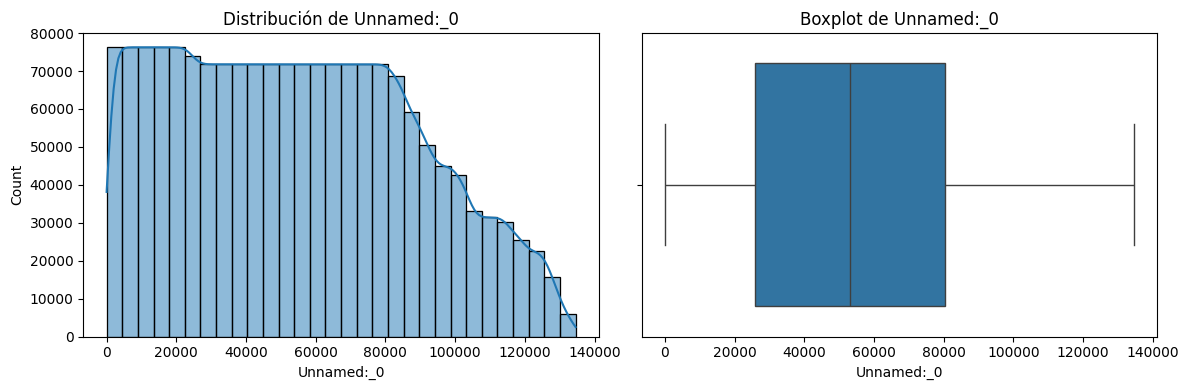

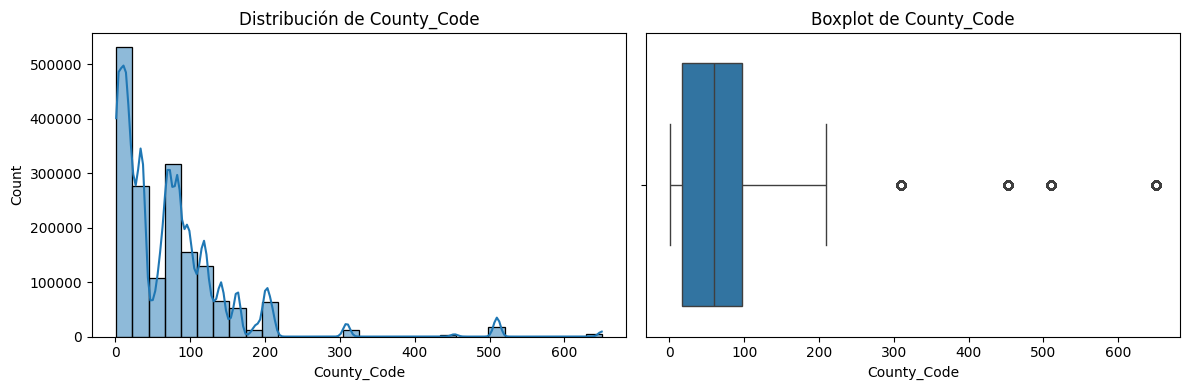

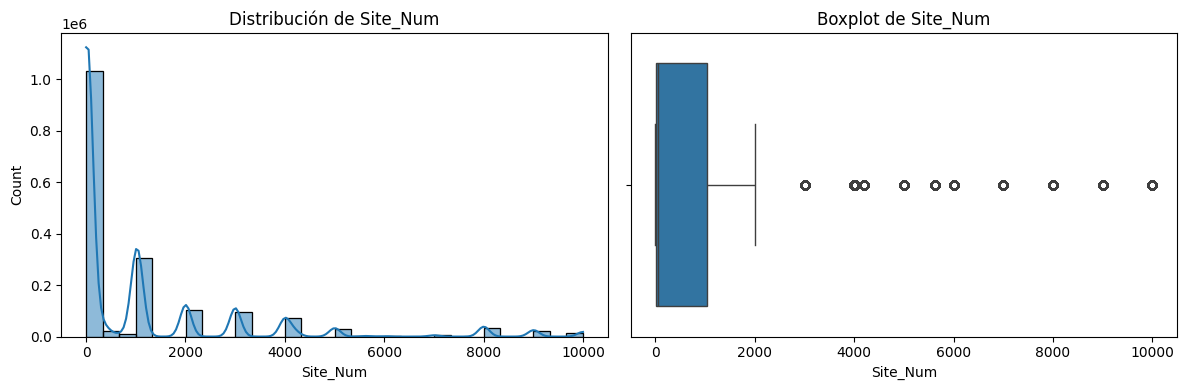

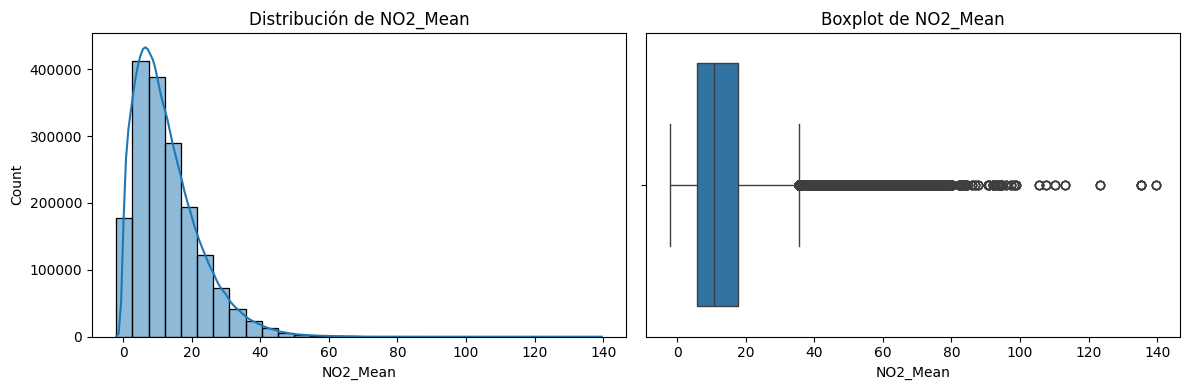

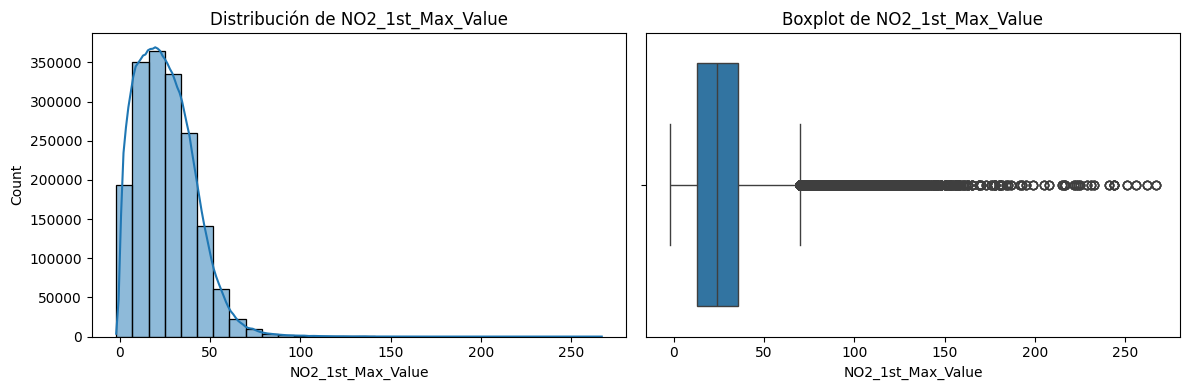

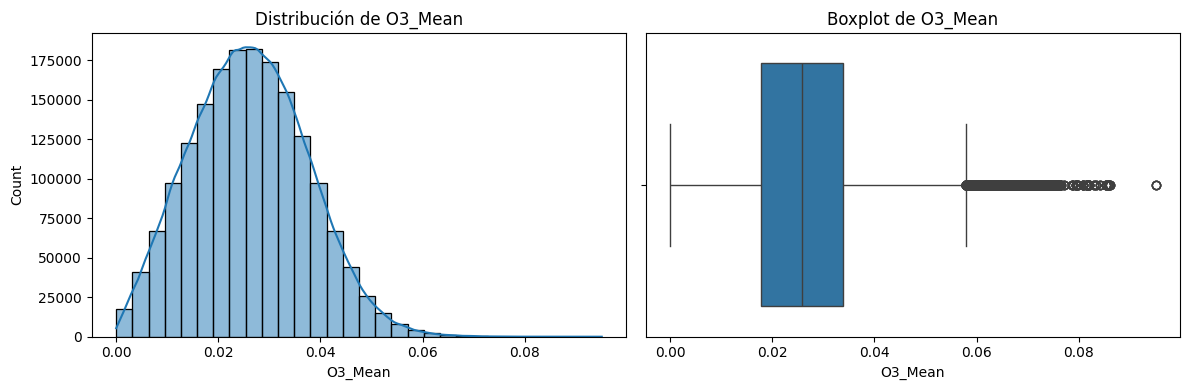

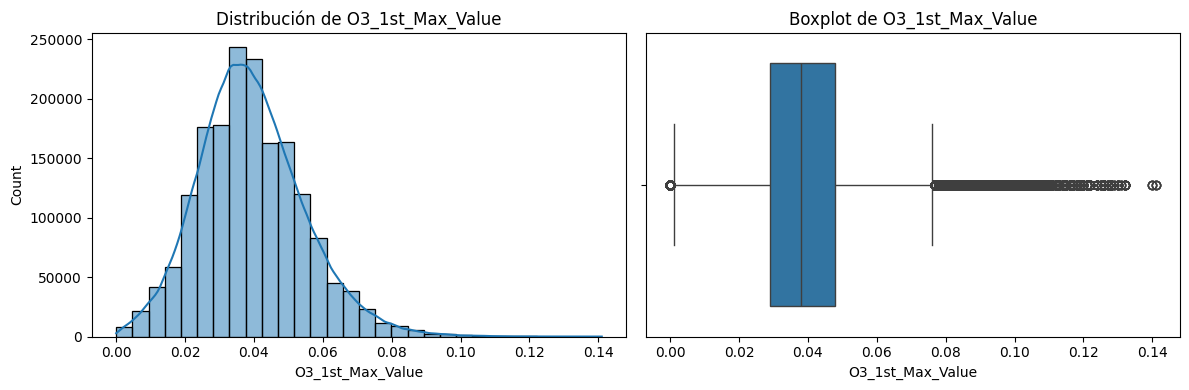

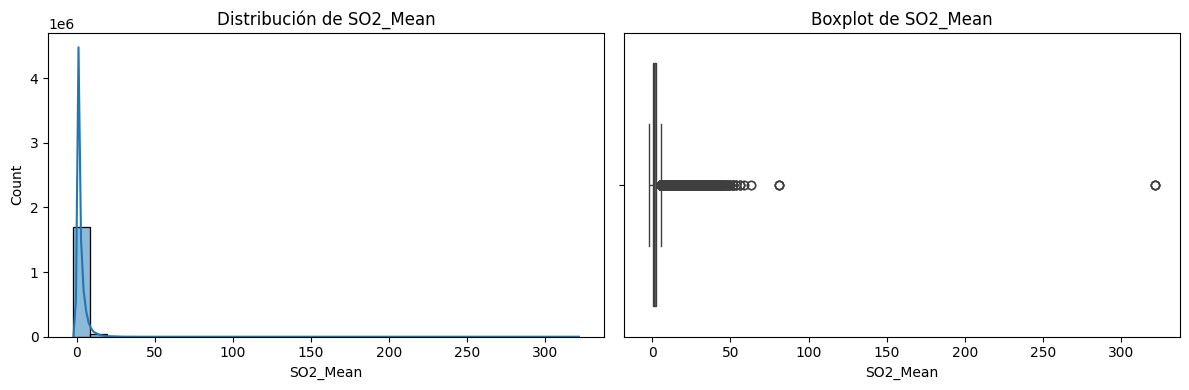

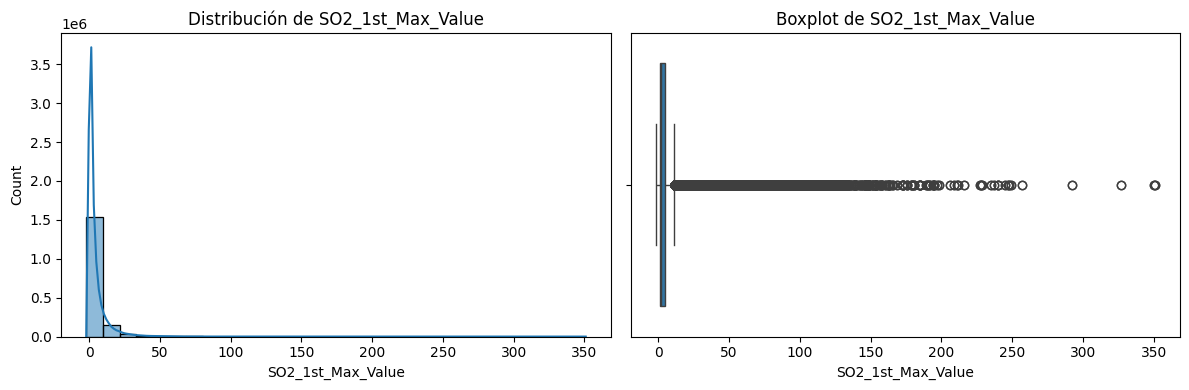

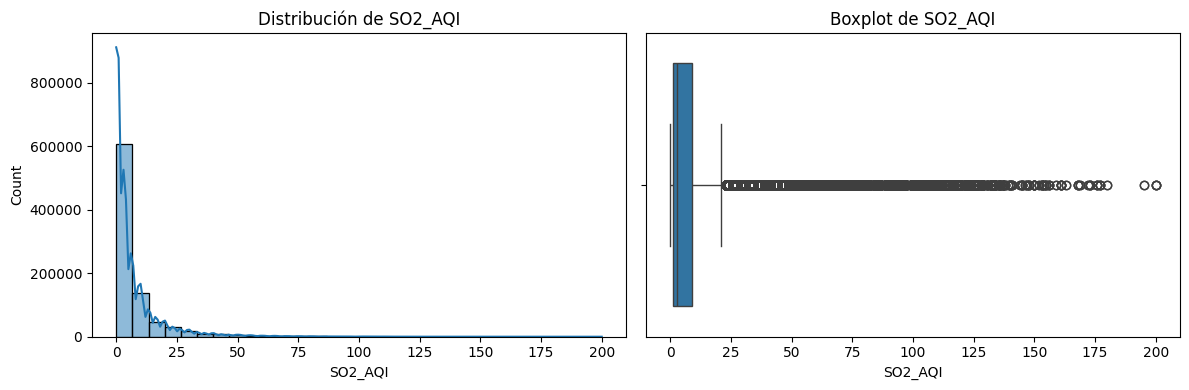

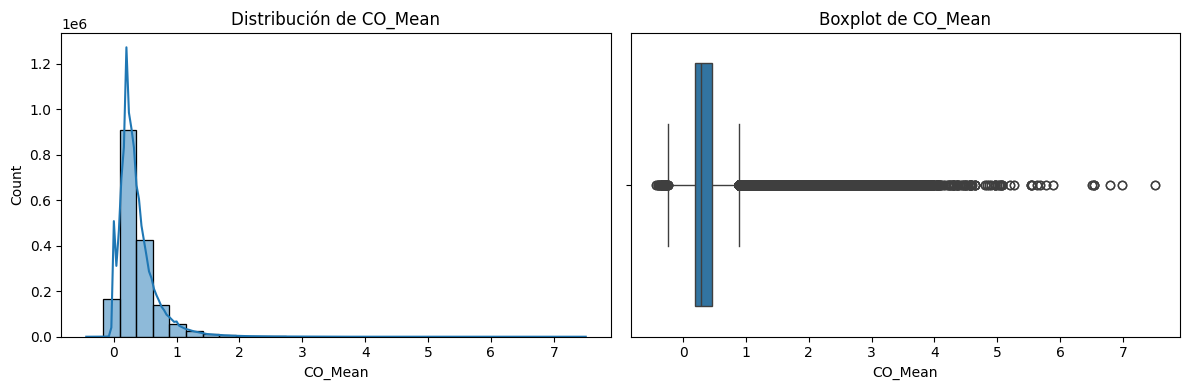

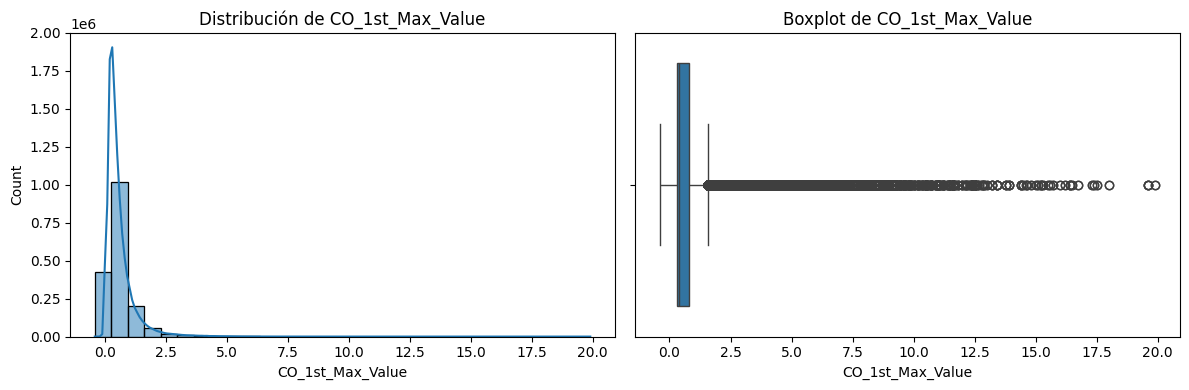

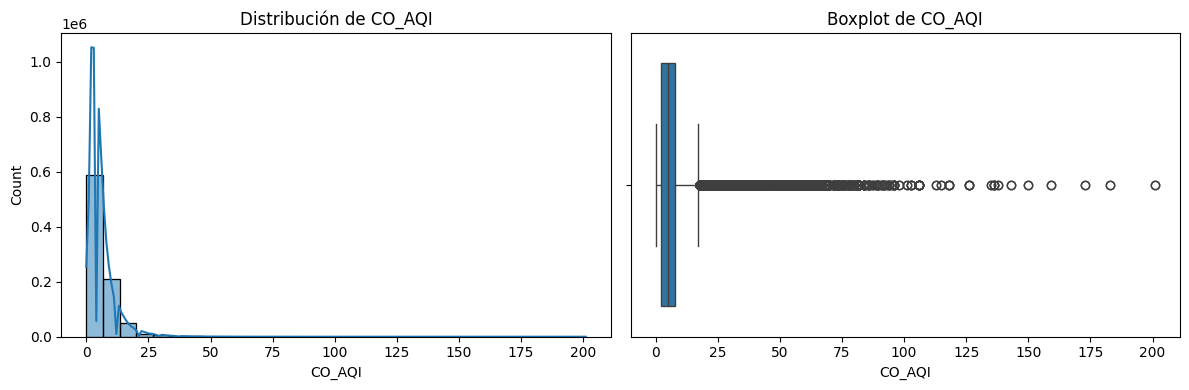

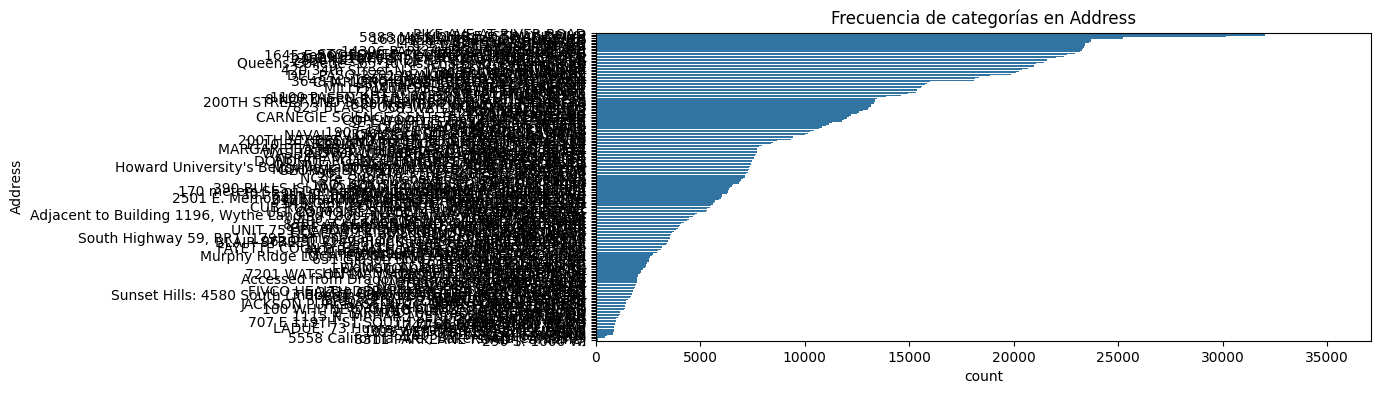

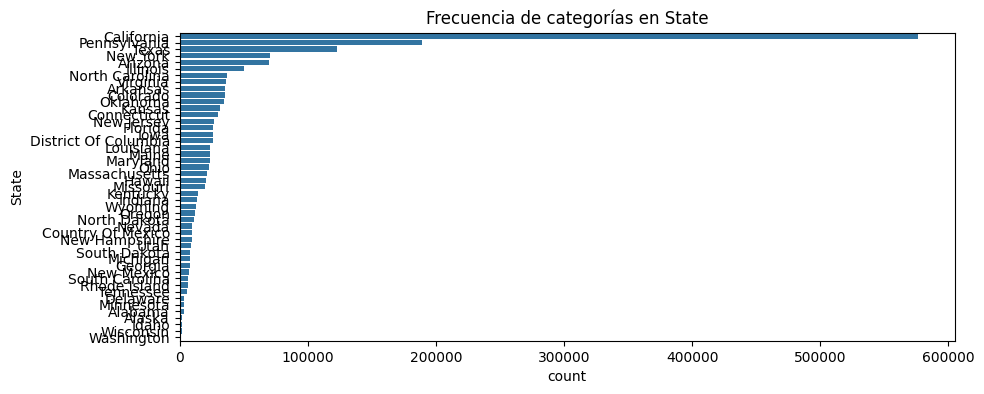

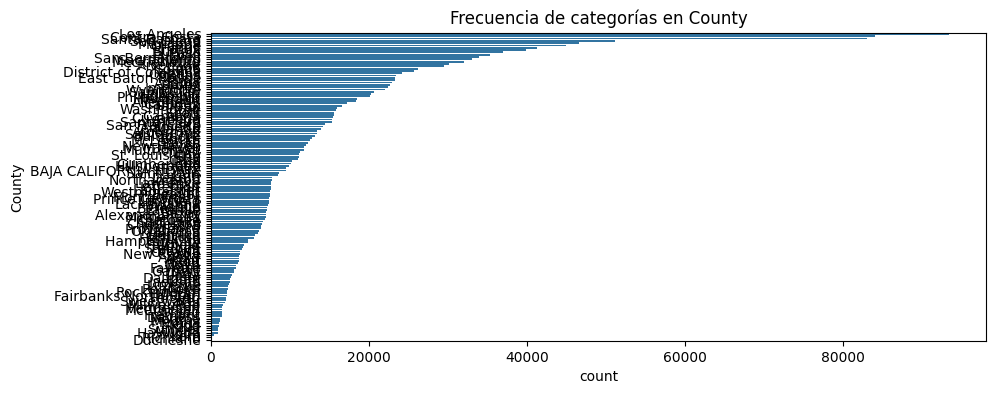

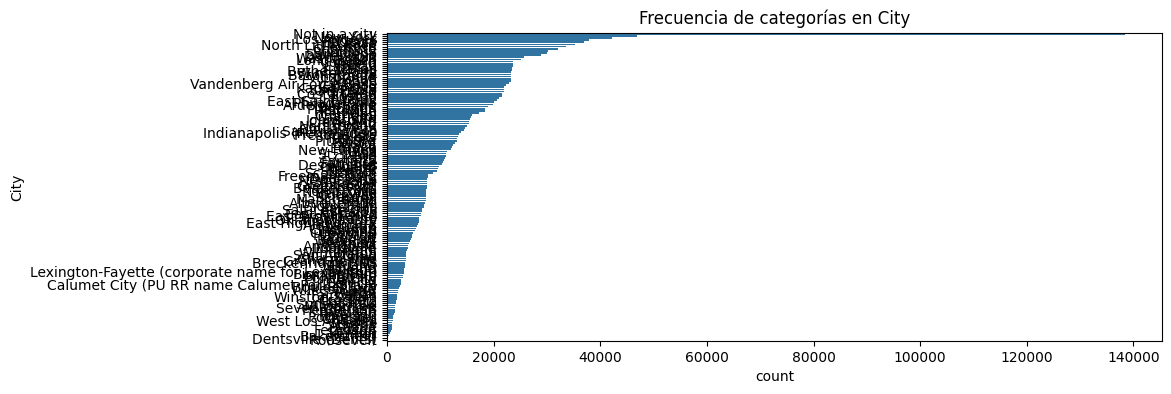

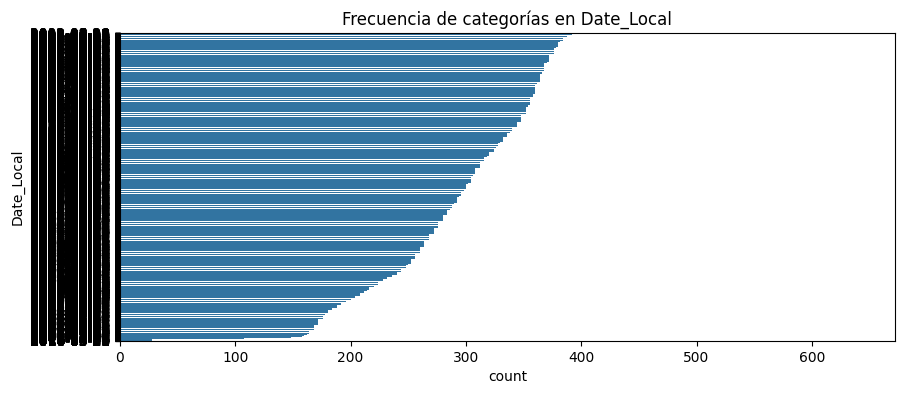

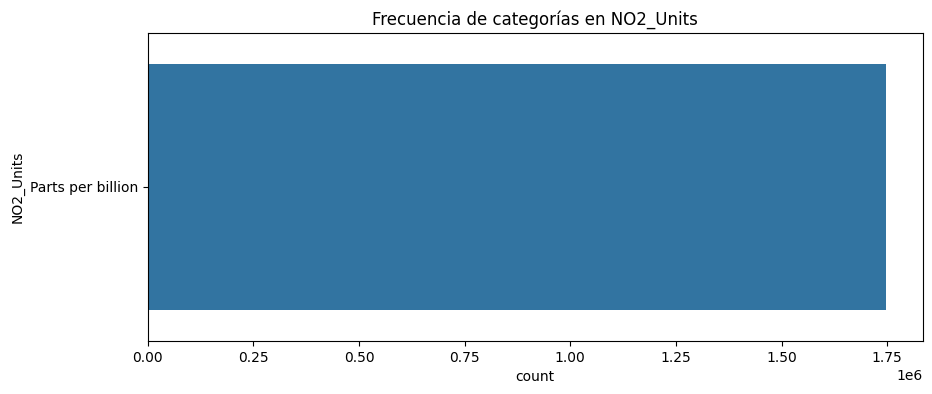

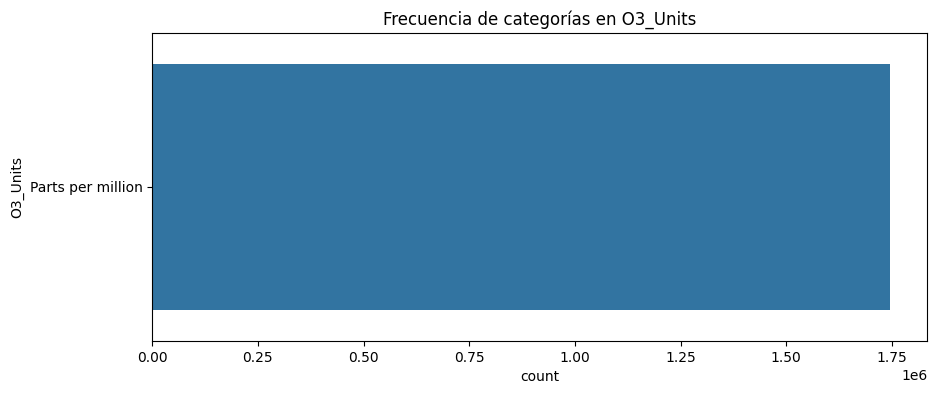

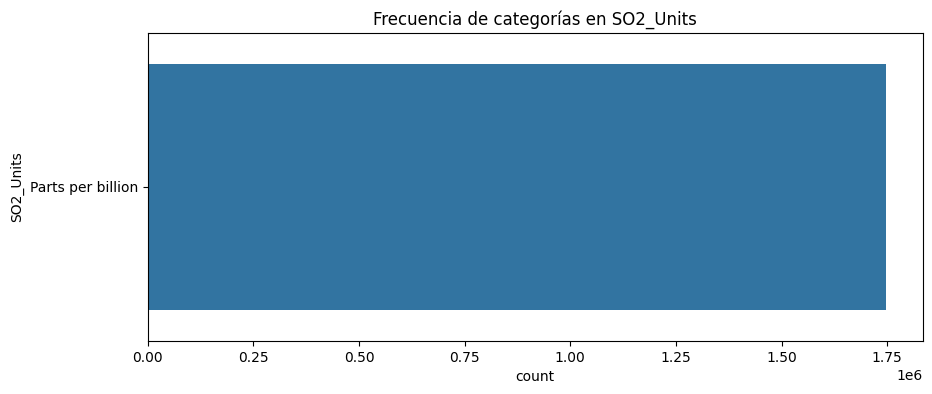

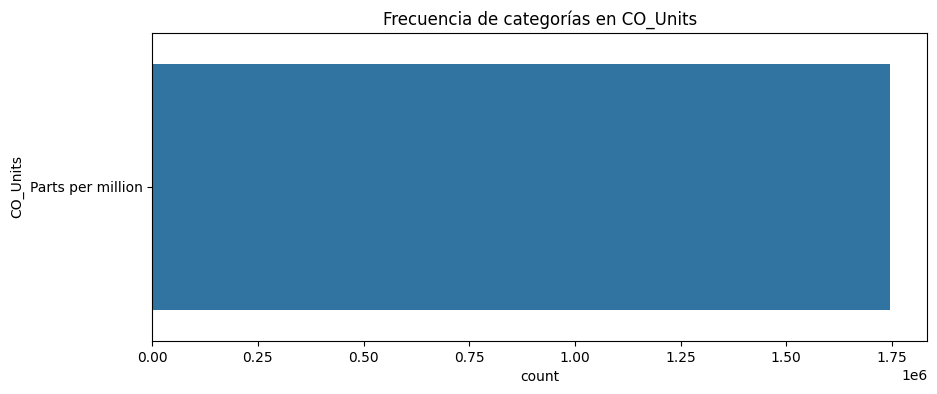

In [6]:
#Gráficos para las variables numéricas
for col in numeric_cols:
    # Creamos una figura con dos gráficos: histograma y boxplot
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Histograma para ver la distribución
    sns.histplot(df[col].dropna(), bins=30, ax=axes[0], kde=True)
    axes[0].set_title(f"Distribución de {col}")

    # Boxplot para detectar posibles outliers
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

# Gráficos para las variables categóricas
for col in categorical_cols:
    # Creamos un gráfico de barras (countplot) para ver la frecuencia de cada categoría
    plt.figure(figsize=(10, 4))
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f"Frecuencia de categorías en {col}")
    plt.show()

Tras mucho tiempo de analisis en informes citados en la bibliografia he llegado a la conclusion que la variable objetivo será: O3_AQI (Índice de Calidad del Aire del Ozono). En primer lugar, el AQI es una métrica estandarizada y directamente interpretable, utilizada por organismos de salud pública y medio ambiente para comunicar la calidad del aire de forma clara y comprensible. A diferencia de las concentraciones brutas (O3_Mean, O3_1st_Max_Value), el AQI ya incorpora umbrales sanitarios y criterios normativos que permiten traducir las mediciones en un impacto directo sobre la salud de la población.

Además, el ozono troposférico es uno de los contaminantes más relevantes en entornos urbanos e industriales, asociado a fenómenos de esmog y a problemas respiratorios, lo cual refuerza su valor como indicador clave de la calidad del aire. En comparación con otras opciones. Ademas ofrece un reto predictivo interesante y al mismo tiempo una mayor utilidad práctica.

#Requisitos Técnicos del Sistema ML

**Métrica de evaluación:** MAE  
**Precisión mínima aceptable:** MAE ≤ 5.0  
**Precisión deseable:** MAE ≤ 3.0  
**CPU máxima:** 4 cores  
**RAM máxima:** 35 GB  
**Tiempo máx. de entrenamiento:** 10 minutos  
**Dependencias:**
- numpy==1.24.3
- pandas==2.1.0
- scikit-learn==1.3.2
- seaborn==0.12.2


# Análisis de outliers.
A continuacion haremos un analisis de outliers para comprender esos valores extremos y determinar si son errores, son eventos raros pero validos o si pueden afectar negativamente

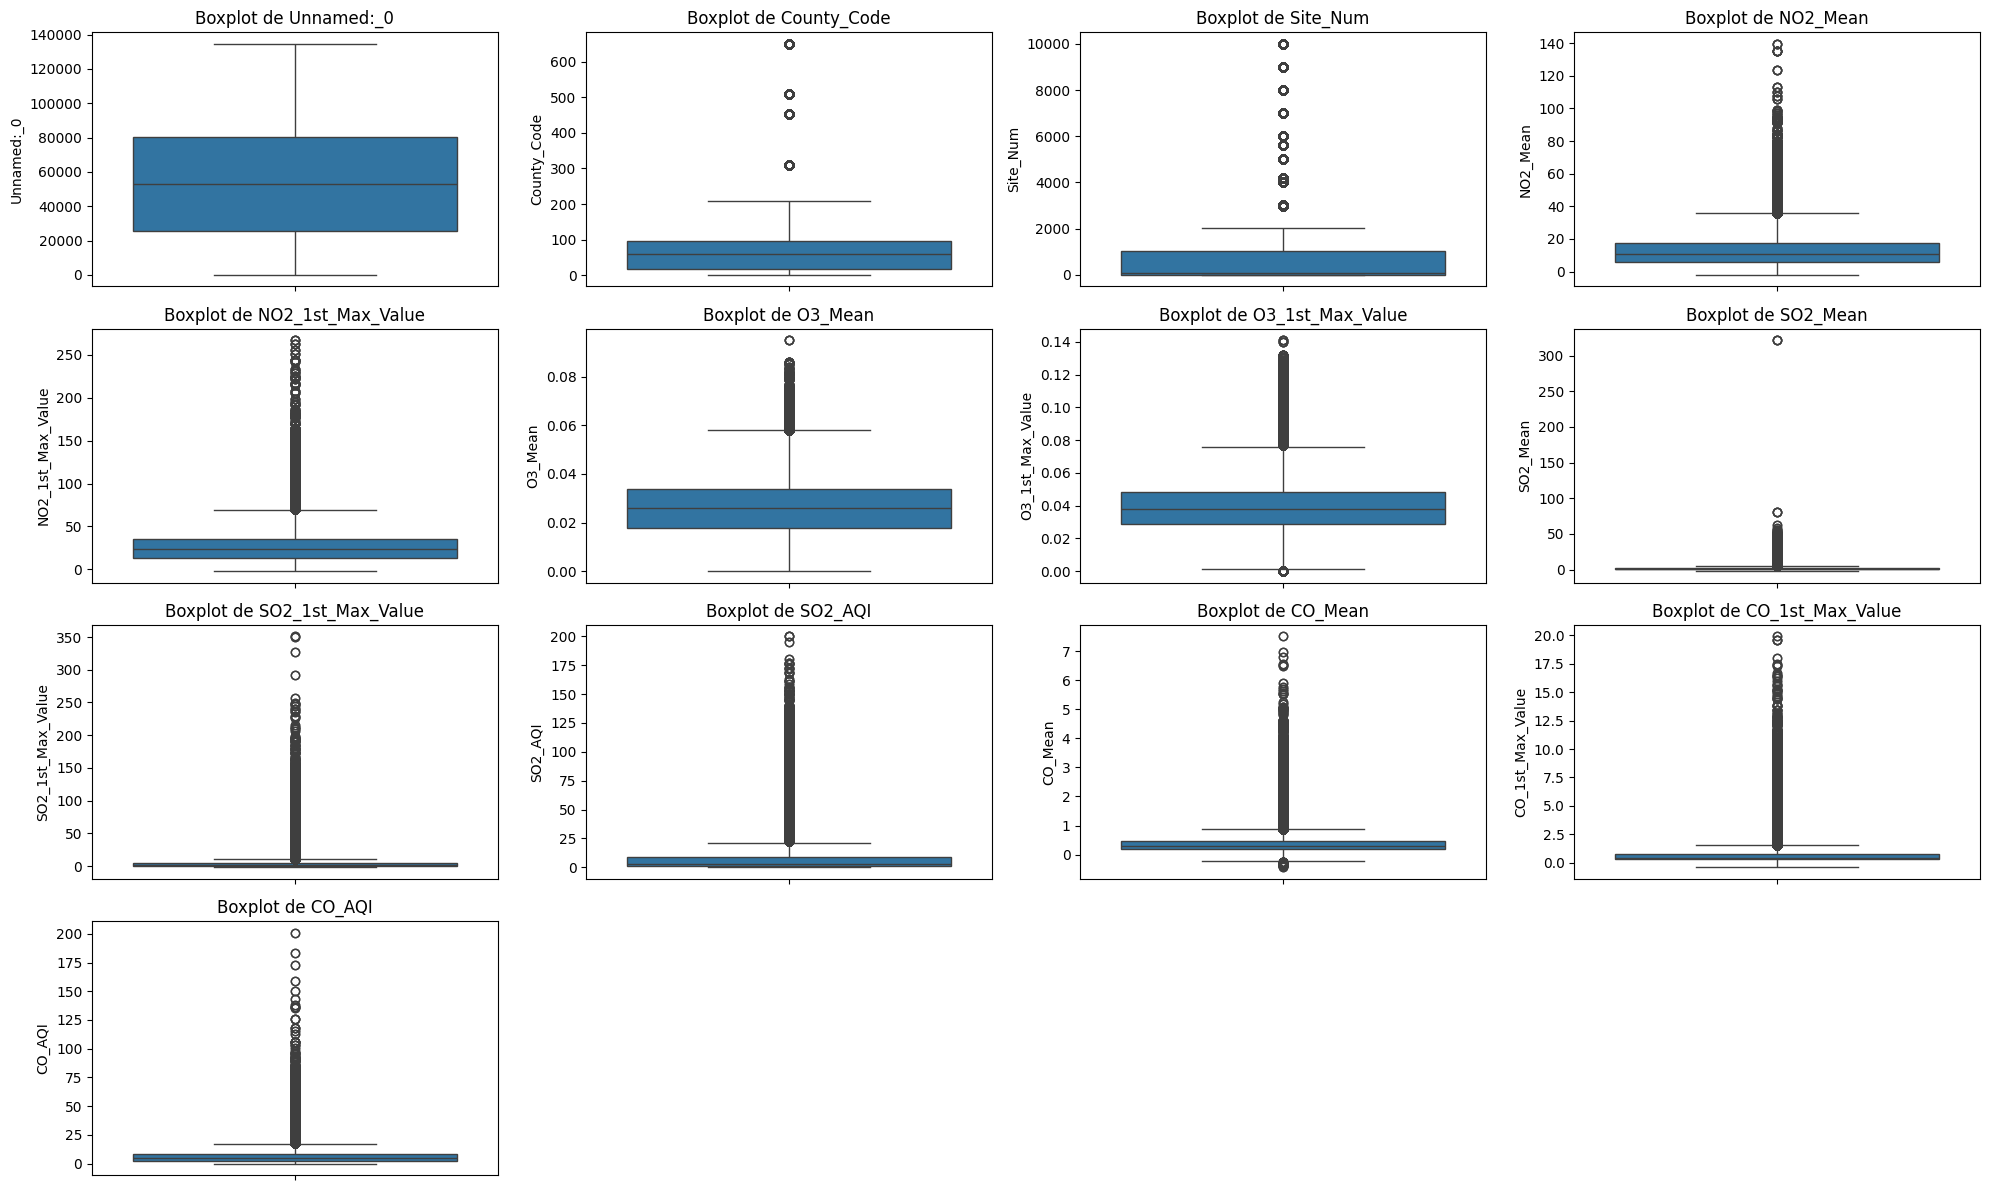

In [7]:
#Para hacer el análisis de outliers emplearemos boxplots
plt.figure(figsize=(20, 12))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot de {col}")
plt.tight_layout()
plt.show()

Tras realizar un análisis exploratorio mediante diagramas de caja, se observa que la mayoría de las variables numéricas del dataset presentan una distribución muy concentrada en valores bajos, con una cantidad significativa de valores atípicos (outliers) hacia valores altos. Esto indica que, aunque la contaminación en general se mantiene en rangos bajos o moderados, existen episodios puntuales con niveles mucho más elevados. Este comportamiento es esperado en datos medioambientales, donde eventos de alta contaminación pueden ser esporádicos y localizados. Por ello, se trabajará se tendrá en cuenta y se continuara con la limpieza de datos y cuando este por acabar y los datos ya esten casi listos se hara limpieza de outliers para no duplicar codigo.

# Analisis de valores nulos

Vamos a identificar las columnas con valores nulos en un DataFrame que puede contener columnas en formato sparse y denso, para ello convertiremos solo las columnas sparse a formato denso temporalmente y así evitar errores al contar los nulos. Luego, seleccionaremos las columnas numéricas que tienen valores faltantes para aplicar imputación usando la media con SimpleImputer, manteniendo las columnas no numéricas sin cambios. Finalmente, actualizaremos el DataFrame original con los valores imputados y mostraremos un resumen estadístico junto con gráficos de caja para analizar la distribución de algunas columnas seleccionadas. Este proceso permite manejar eficientemente datos dispersos y completos sin perder información ni generar advertencias.

In [8]:
for col in df.columns:
    if pd.api.types.is_sparse(df[col]) and pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].sparse.to_dense()

# Paso 1: Contar valores nulos sin warnings
na_counts = df.isna().sum()
cols_with_na = na_counts[na_counts > 0].index.tolist()

print("Columnas con valores nulos y su conteo:")
print(na_counts[na_counts > 0])

<ipython-input-8-a7d2155a20b5>:2: DeprecationWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if pd.api.types.is_sparse(df[col]) and pd.api.types.is_numeric_dtype(df[col]):


Columnas con valores nulos y su conteo:
SO2_AQI    872907
CO_AQI     873323
dtype: int64


         Unnamed:_0    State_Code   County_Code      Site_Num      NO2_Mean  \
count  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06   
mean   5.471414e+04  2.230907e+01  7.169381e+01  1.118214e+03  1.282193e+01   
std    3.372908e+04  1.725621e+01  7.948023e+01  2.003103e+03  9.504814e+00   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00 -2.000000e+00   
25%    2.575300e+04  6.000000e+00  1.700000e+01  9.000000e+00  5.750000e+00   
50%    5.304500e+04  1.700000e+01  5.900000e+01  6.000000e+01  1.073913e+01   
75%    8.033600e+04  4.000000e+01  9.700000e+01  1.039000e+03  1.771364e+01   
max    1.345750e+05  8.000000e+01  6.500000e+02  9.997000e+03  1.395417e+02   

       NO2_1st_Max_Value  NO2_1st_Max_Hour       NO2_AQI       O3_Mean  \
count       1.746661e+06      1.746661e+06  1.746661e+06  1.746661e+06   
mean        2.541485e+01      1.173102e+01  2.389822e+01  2.612485e-02   
std         1.599963e+01      7.877501e+00  1.516280e+01  1.136974

<Axes: >

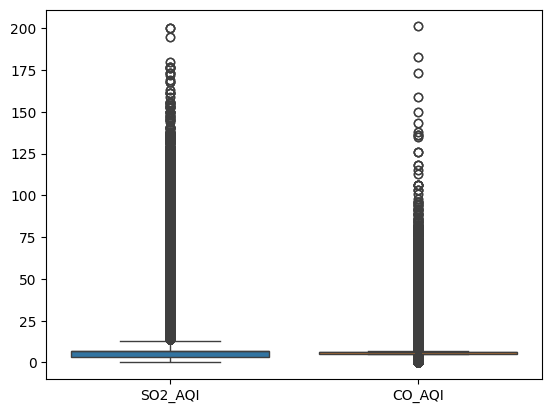

In [9]:
# Imputar valores faltantes en columnas numéricas
numeric_cols = df.select_dtypes(include=["number"]).columns
numeric_cols_with_na = [col for col in numeric_cols if col in cols_with_na]

if len(numeric_cols_with_na) > 0:
    imputer = SimpleImputer(strategy= "mean")
    df_numeric_imputed_array = imputer.fit_transform(df[numeric_cols_with_na])
    df_numeric_imputed = pd.DataFrame(df_numeric_imputed_array, columns=numeric_cols_with_na)
    df.loc[:, numeric_cols_with_na] = df_numeric_imputed
else:
    print("No hay columnas numéricas con valores nulos para imputar.")

# Mostrar resumen estadístico y boxplots
print(df.describe())

boxplot_columns = ["SO2_AQI", "CO_AQI"]
sns.boxplot(data=df[boxplot_columns])

La columna "None" no se elimina con el código de imputación porque dicha operación solo afecta a columnas numéricas, mientras que "None" es una columna no numérica que permanece intacta y con valores nulos. Por lo tanto, los valores faltantes en esa columna siguen presentes después del proceso. Por lo que la eliminaremos directamente

In [10]:
df.columns

Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'Address',
       'State', 'County', 'City', 'Date_Local', 'NO2_Units', 'NO2_Mean',
       'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI', 'O3_Units',
       'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Units',
       'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI',
       'CO_Units', 'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI'],
      dtype='object')

In [11]:
if "None" in df.columns:
    df.drop(columns=["None"], inplace=True)
    print('Columna "None" eliminada.')
else:
    print('La columna "None" no existe en el DataFrame.')

# Ahora comprobar si siguen habiendo valores nulos
print(df.isna().any().any())
print(df.isna().sum()[df.isna().sum() > 0])


La columna "None" no existe en el DataFrame.
False
Series([], dtype: int64)


# Analisis de columnas categoricas

Se realizará un análisis de las columnas categóricas presentes en el DataFrame para entender su estructura y contenido. Primero se identificarán las columnas de tipo objeto que suelen representar variables categóricas. Luego se inspeccionarán los tipos de datos que contienen para asegurar consistencia y detectar posibles valores atípicos o inconsistentes. También se analizará el número de categorías únicas en cada columna y se mostrarán ejemplos representativos de sus valores. Este análisis es fundamental para decidir cómo limpiar, transformar o codificar estas variables para su posterior uso en modelos de machine learning.

In [12]:
categorical_cols_clean = df.select_dtypes(include=['object']).columns
print("Características categóricas analizadas:", list(categorical_cols_clean))
print()

# De esta manera nos aseguramos que las columnas categoricas con str
for col in categorical_cols:
    tipos = df[col].map(type).unique()
    print(f"{col}: tipos de datos encontrados -> {tipos}")

# De esta manera nos haremos una idea de lo que hay en cada columna
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"- Número de categorías únicas: {df[col].nunique()}")
    print(f"- Ejemplos de valores: {df[col].unique()[:10]}")

Características categóricas analizadas: ['Address', 'State', 'County', 'City', 'Date_Local', 'NO2_Units', 'O3_Units', 'SO2_Units', 'CO_Units']

Address: tipos de datos encontrados -> [<class 'str'>]
State: tipos de datos encontrados -> [<class 'str'>]
County: tipos de datos encontrados -> [<class 'str'>]
City: tipos de datos encontrados -> [<class 'str'>]
Date_Local: tipos de datos encontrados -> [<class 'str'>]
NO2_Units: tipos de datos encontrados -> [<class 'str'>]
O3_Units: tipos de datos encontrados -> [<class 'str'>]
SO2_Units: tipos de datos encontrados -> [<class 'str'>]
CO_Units: tipos de datos encontrados -> [<class 'str'>]

Address:
- Número de categorías únicas: 204
- Ejemplos de valores: ['1645 E ROOSEVELT ST-CENTRAL PHOENIX STN'
 '2857 N MILLER RD-S SCOTTSDALE STN' '1237 S. BEVERLY , TUCSON'
 '2956-A TREAT BOULEVARD' '5551 BETHEL ISLAND RD'
 'UNIT 759 EL PORTAL SHOPPING CENTER, San Pablo'
 '583 W. 10TH ST., PITTSBURG' '1029 ETHEL ST, CALEXICO HIGH SCHOOL'
 '5558 Californi

Se eliminarán primero las columnas que indican las unidades de medida, ya que no aportan información directa para el modelo y pueden confundir si se dejan. Estas columnas usualmente terminan con _Units.

In [13]:
# Eliminar columnas que indican unidades (terminan con '_Units')
unit_cols = [col for col in df.columns if col.endswith("_Units")]
for col in unit_cols:
    print(f"Eliminando columna: {col}")
df.drop(columns=unit_cols, inplace=True)

Eliminando columna: NO2_Units
Eliminando columna: O3_Units
Eliminando columna: SO2_Units
Eliminando columna: CO_Units


A continuación para facilitar el análisis y el entrenamiento de modelos, se normalizan las columnas numéricas con MinMaxScaler para que todas estén en la misma escala, entre 0 y 1. Se normalizan las variables numéricas usando MinMaxScaler para mejorar el rendimiento de modelos sensibles a diferencias de escala. Aunque se pierde el significado físico directo de los valores, se facilita la comparación relativa entre variables. Esta técnica es especialmente útil cuando las variables tienen rangos muy diferentes y no se requiere interpretar el valor numérico literal en el análisis.

In [14]:
prefixes = [col.split('_')[0] for col in unit_cols]
print(prefixes)
selected_cols = [col for col in df.columns if any(prefix in col for prefix in prefixes)]
print(selected_cols)

['NO2', 'O3', 'SO2', 'CO']
['NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI', 'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI']


In [15]:
scaler = MinMaxScaler()
df[selected_cols] = scaler.fit_transform(df[selected_cols])

In [16]:
# Verificamos observando las 5 primeras columnas si se cumple la condicion
# de max y mins entre 0 y 1
min_vals, max_vals = df[selected_cols].min(), df[selected_cols].max()

if ((min_vals >= 0) & (max_vals <= 1)).all():
    print(df[selected_cols].head())

A continuación, se procesará el DataFrame df para extraer información temporal de la columna 'Date_Local', creando nuevas columnas con el año, mes y día de la semana, siempre que esta columna exista. Después, se eliminarán las columnas 'Date_Local' y 'Address' si están presentes, para limpiar el dataset.
Se elimina la columna "Address" porque es muy específica y detallada, mientras que ya contamos con otras columnas geográficas como "State", "County" y "City" que resumen suficientemente la ubicación para el análisis.

In [17]:
# Solo crear las columnas si "Date_Local" existe
if "Date_Local" in df.columns:
    df["year"] = pd.to_datetime(df["Date_Local"]).dt.year
    df["month"] = pd.to_datetime(df["Date_Local"]).dt.month
    df["weekday"] = pd.to_datetime(df["Date_Local"]).dt.weekday
else:
    print("Date_Local ya estaba borrado, no se crearon year, month ni weekday.")

# Ahora intentamos eliminar "Date_Local" y "Address" solo si existen
cols_to_drop = []
if "Date_Local" in df.columns:
    cols_to_drop.append("Date_Local")
else:
    print("Date_Local ya estaba borrado.")

if "Address" in df.columns:
    cols_to_drop.append("Address")
else:
    print("Address ya estaba borrado.")

# Eliminamos las columnas que existan
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)

# Comprobamos las columnas resultantes
print("Columnas finales en df:")
print(df.columns)


Columnas finales en df:
Index(['Unnamed:_0', 'State_Code', 'County_Code', 'Site_Num', 'State',
       'County', 'City', 'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour',
       'NO2_AQI', 'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI',
       'SO2_Mean', 'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI',
       'CO_Mean', 'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'year',
       'month', 'weekday'],
      dtype='object')


# Correlacion de caracteristicas

Primero, se reordenan los datos aleatoriamente para evitar sesgos por el orden original en que estaban organizados. Luego, se realiza un resumen estadístico para entender las características principales de cada variable y visualizar sus distribuciones, lo cual ayuda a detectar posibles problemas como valores atípicos. A continuación, se calcula una matriz de correlación que permite identificar qué variables están más relacionadas entre sí y, especialmente, con la variable objetivo, facilitando así la selección de características relevantes. Finalmente, el conjunto de datos se divide en subsets de entrenamiento, validación y prueba, o alternativamente se utiliza un esquema de validación cruzada (como K-fold) para asegurar que los modelos sean evaluados de forma robusta y generalizable.

         Unnamed:_0    State_Code   County_Code      Site_Num      NO2_Mean  \
count  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06  1.746661e+06   
mean   5.471414e+04  2.230907e+01  7.169381e+01  1.118214e+03  1.047178e-01   
std    3.372908e+04  1.725621e+01  7.948023e+01  2.003103e+03  6.715206e-02   
min    0.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00   
25%    2.575300e+04  6.000000e+00  1.700000e+01  9.000000e+00  5.475419e-02   
50%    5.304500e+04  1.700000e+01  5.900000e+01  6.000000e+01  9.000268e-02   
75%    8.033600e+04  4.000000e+01  9.700000e+01  1.039000e+03  1.392780e-01   
max    1.345750e+05  8.000000e+01  6.500000e+02  9.997000e+03  1.000000e+00   

       NO2_1st_Max_Value  NO2_1st_Max_Hour       NO2_AQI       O3_Mean  \
count       1.746661e+06      1.746661e+06  1.746661e+06  1.746661e+06   
mean        1.019139e-01      5.100445e-01  1.810471e-01  2.747583e-01   
std         5.947818e-02      3.425000e-01  1.148697e-01  1.195770

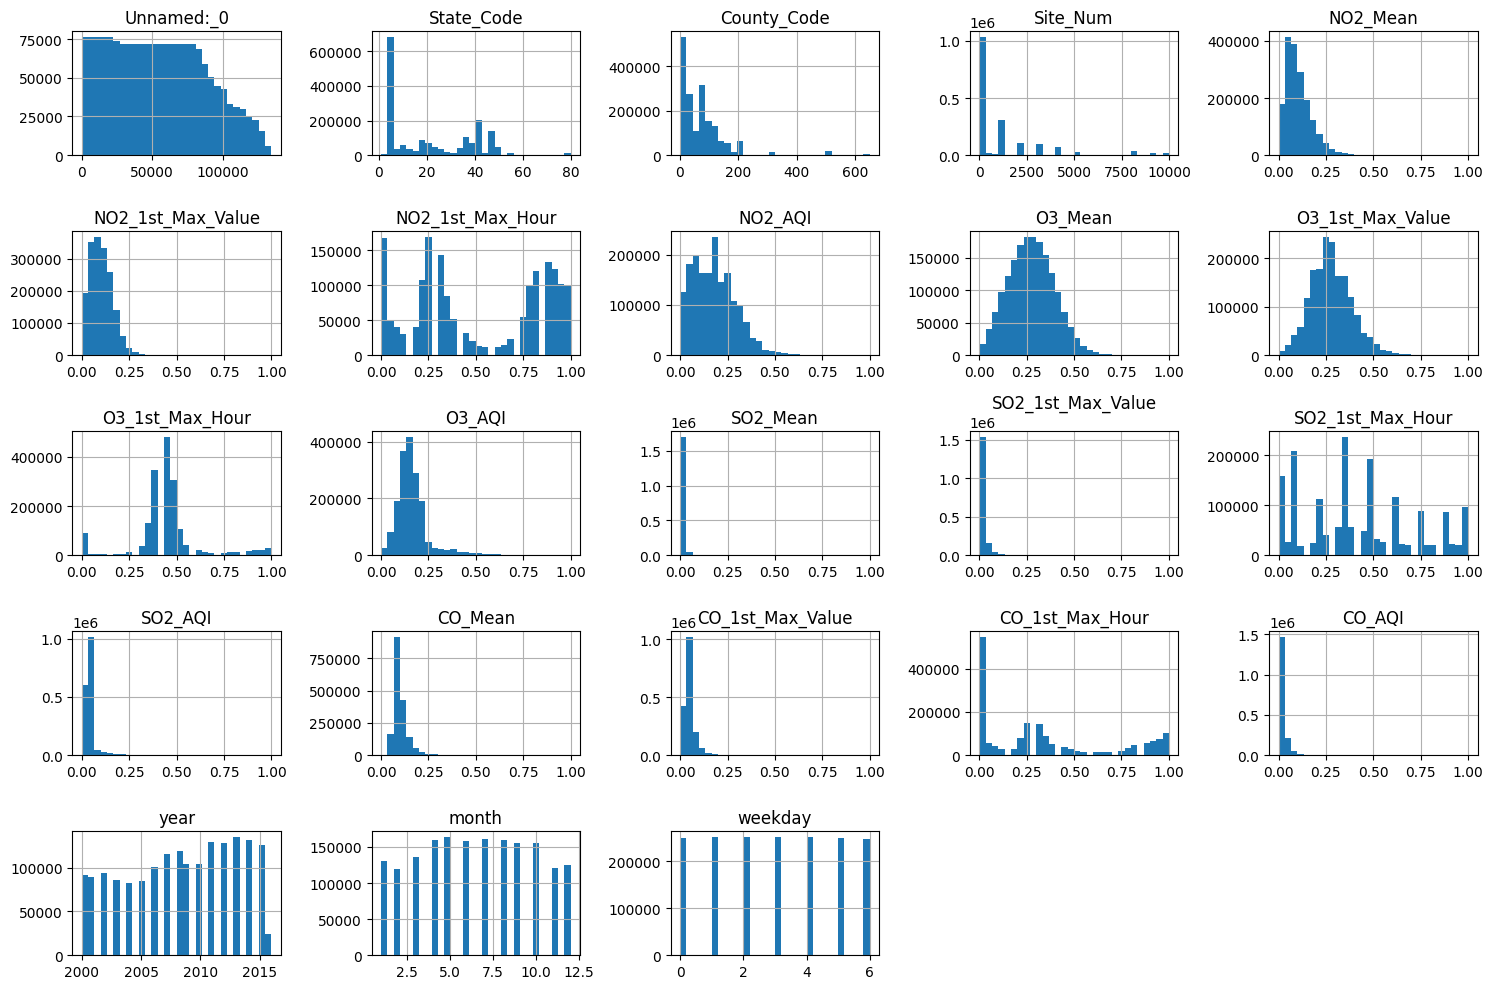

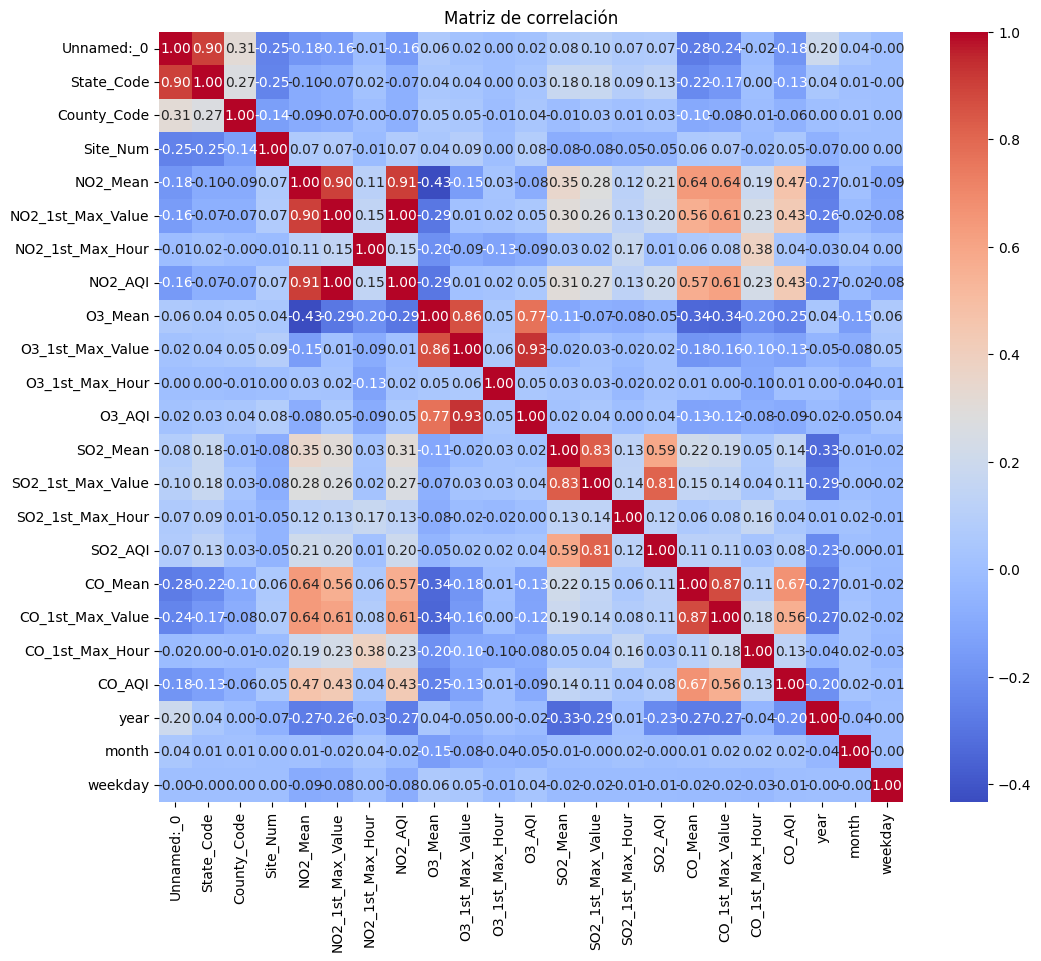

In [18]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
print(df.describe())

df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

corr_matrix = df.select_dtypes(include=["number"]).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


Se eliminará la columna "Unnamed:_0" porque su nombre sugiere que es un índice automático generado al exportar o importar los datos (por ejemplo, al leer un archivo CSV), y no aporta información relevante para el análisis ni para el modelado. Mantenerla solo añadiría ruido al dataset. De todas forma ahora se comprobrá si de verdad es un indice:

In [19]:
if "Unnamed:_0" in df.columns:
    print("Valores únicos en 'Unnamed:_0':")
    print(df["Unnamed:_0"].unique())

    df.drop(columns=["Unnamed:_0"], inplace=True)
    print("\nColumna 'Unnamed:_0' eliminada.")
else:
    print("La columna 'Unnamed:_0' no existe en el DataFrame.")

print("\nColumnas finales en el DataFrame:")
print(df.columns)

Valores únicos en 'Unnamed:_0':
[ 44403  15612  12092 ... 132237 133971 133932]

Columna 'Unnamed:_0' eliminada.

Columnas finales en el DataFrame:
Index(['State_Code', 'County_Code', 'Site_Num', 'State', 'County', 'City',
       'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI',
       'O3_Mean', 'O3_1st_Max_Value', 'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean',
       'SO2_1st_Max_Value', 'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean',
       'CO_1st_Max_Value', 'CO_1st_Max_Hour', 'CO_AQI', 'year', 'month',
       'weekday'],
      dtype='object')


In [20]:
target_corr = corr_matrix["O3_AQI"].sort_values(ascending=False)
print(target_corr)

O3_AQI               1.000000
O3_1st_Max_Value     0.931867
O3_Mean              0.768771
Site_Num             0.083351
NO2_AQI              0.049027
NO2_1st_Max_Value    0.048743
O3_1st_Max_Hour      0.048395
SO2_1st_Max_Value    0.044307
County_Code          0.040689
SO2_AQI              0.036757
weekday              0.036273
State_Code           0.033527
Unnamed:_0           0.017080
SO2_Mean             0.015523
SO2_1st_Max_Hour     0.000883
year                -0.019809
month               -0.047594
CO_1st_Max_Hour     -0.078250
NO2_Mean            -0.082361
NO2_1st_Max_Hour    -0.086782
CO_AQI              -0.091990
CO_1st_Max_Value    -0.120001
CO_Mean             -0.129736
Name: O3_AQI, dtype: float64


La correlación de Pearson muestra una relación muy alta entre O3_AQI y las variables O3_1st_Max_Value y O3_Mean porque O3_AQI se calcula directamente a partir de estos valores. Esto significa que estas columnas contienen información casi idéntica a la variable objetivo, por lo que un modelo entrenado con ellas tenderá a aprender simplemente a replicar ese cálculo, limitando su capacidad para generalizar y detectar patrones adicionales en otras variables.

In [21]:
df.drop(columns=["O3_1st_Max_Value", "O3_Mean"], inplace=True)
print("Columnas 'O3_1st_Max_Value' y 'O3_Mean' eliminadas.")
print("Columnas actuales en el DataFrame:")
print(df.columns)

Columnas 'O3_1st_Max_Value' y 'O3_Mean' eliminadas.
Columnas actuales en el DataFrame:
Index(['State_Code', 'County_Code', 'Site_Num', 'State', 'County', 'City',
       'NO2_Mean', 'NO2_1st_Max_Value', 'NO2_1st_Max_Hour', 'NO2_AQI',
       'O3_1st_Max_Hour', 'O3_AQI', 'SO2_Mean', 'SO2_1st_Max_Value',
       'SO2_1st_Max_Hour', 'SO2_AQI', 'CO_Mean', 'CO_1st_Max_Value',
       'CO_1st_Max_Hour', 'CO_AQI', 'year', 'month', 'weekday'],
      dtype='object')


# Prepocesamiento de datos numericos y categoricos

Dado que la columna State tiene un número manejable de categorías (47), aplicar One-Hot Encoding es una buena opción para convertir cada estado en una columna binaria sin perder información. Esto permite que el modelo interprete cada estado como una característica independiente.

Por otro lado, County y City tienen muchas más categorías (133 y 144 respectivamente), lo que haría que One-Hot Encoding genere demasiadas columnas, aumentando la dimensionalidad y el riesgo de sobreajuste. Para estas variables, usamos Frequency Encoding, que reemplaza cada categoría por la frecuencia con la que aparece en el dataset. Esto reduce la dimensionalidad y permite al modelo captar la importancia relativa de cada categoría sin explotar la cantidad de columnas.

In [22]:
# One-Hot Encoding para 'State'
df = pd.get_dummies(df, columns=["State"], drop_first=True)

# Convertir columnas booleanas de 'State_' a 0/1
state_cols = [col for col in df.columns if col.startswith("State_")]
df[state_cols] = df[state_cols].astype(int)

# Frequency Encoding para 'County' y 'City'
for col in ["County", "City"]:
    freq_encoding = df[col].value_counts(normalize=True)
    df[col + "_freq_enc"] = df[col].map(freq_encoding)

# Eliminamos las columnas originales 'County' y 'City' tras la codificación
df.drop(columns=["County", "City"], inplace=True)

# Verificamos las nuevas columnas
print(df.filter(regex="State_|_freq_enc").head())

   State_Code  State_Alaska  State_Arizona  State_Arkansas  State_California  \
0           8             0              0               0                 0   
1           6             0              0               0                 1   
2           6             0              0               0                 1   
3          42             0              0               0                 0   
4           6             0              0               0                 1   

   State_Colorado  State_Connecticut  State_Country Of Mexico  State_Delaware  \
0               1                  0                        0               0   
1               0                  0                        0               0   
2               0                  0                        0               0   
3               0                  0                        0               0   
4               0                  0                        0               0   

   State_District Of Columbia  .

In [23]:
# Comprobacion de que las columnas ya estan con los cambios aplicados
df.head()

,State_Code,County_Code,Site_Num,NO2_Mean,NO2_1st_Max_Value,NO2_1st_Max_Hour,NO2_AQI,O3_1st_Max_Hour,O3_AQI,SO2_Mean,...,State_South Dakota,State_Tennessee,State_Texas,State_Utah,State_Virginia,State_Washington,State_Wisconsin,State_Wyoming,County_freq_enc,City_freq_enc
0,8,1,3001,0.174169,0.167286,0.304348,0.310606,0.434783,0.279817,0.012360,...,0,0,0,0,0,0,0,0,0.013124,0.012009
1,6,23,1004,0.022873,0.017844,0.391304,0.015152,0.695652,0.165138,0.005935,...,0,0,0,0,0,0,0,0,0.010618,0.006985
2,6,19,8,0.077408,0.074349,0.217391,0.128788,0.391304,0.545872,0.016863,...,0,0,0,0,0,0,0,0,0.008761,0.008761
3,42,17,12,0.131587,0.133829,0.782609,0.242424,0.000000,0.165138,0.014034,...,0,0,0,0,0,0,0,0,0.007327,0.007327
4,6,23,1004,0.025866,0.017472,0.565217,0.015152,0.434783,0.151376,0.004759,...,0,0,0,0,0,0,0,0,0.010618,0.006985


# Modelo base
Ahora se aplica bucketización porque vamos a entrenar un modelo de regresión lineal.
La regresión lineal solo puede capturar relaciones lineales entre las variables y el objetivo.
Si las variables tienen efectos no lineales o por rangos, el modelo no los detectará bien.
Al bucketizar, transformamos las variables continuas en categorías discretas según rangos específicos.
Esto permite que la regresión lineal capture cambios de efecto por tramos, simulando una relación no lineal simple.
Además, reduce el impacto de valores extremos que podrían sesgar la línea de regresión.
Así, mejoramos la capacidad del modelo lineal para ajustarse a datos con patrones más complejos sin usar polinomios o modelos más complicados.

In [24]:
# Copia del dataset original
df_binned = df.copy()

# Bucketización (ajusta los rangos según tu dominio)
for col in ["NO2_1st_Max_Value", "SO2_1st_Max_Value", "CO_1st_Max_Value"]:
    df_binned[f"{col}_bin"] = pd.cut(df_binned[col], bins=[0, 10, 20, 30, 40, 50, 100], labels=False)

X = df_binned.drop(columns=["O3_AQI"])  # recuerda usar df_binned con las nuevas columnas bucketizadas
y = df_binned["O3_AQI"]

X = df.drop(columns=["O3_AQI"])  # debe ser un DataFrame
y = df["O3_AQI"]                # debe ser una Serie

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Regresión lineal:**

Se usa cuando asumimos que la relación entre las variables independientes y la dependiente es lineal, simple de interpretar y rápida de entrenar.
Permite entender fácilmente el efecto de cada variable sobre el objetivo a través de sus coeficientes.

In [25]:
# Entrenar modelo lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluar
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error cuadrático medio): {mse:.2f}")
print(f"R2 (Coeficiente de determinación): {r2:.4f}")


MSE (Error cuadrático medio): 0.01
R2 (Coeficiente de determinación): 0.1618


En los resultados, un R² bajo (~0.16) indica que el modelo solo explica una pequeña parte de la variabilidad del O3_AQI.
Esto puede deberse a relaciones no lineales que la regresión lineal no capta, o a la presencia de ruido y variables irrelevantes.
Es útil como línea base porque permite comparar modelos más avanzados frente a un enfoque sencillo.
Sin embargo, su capacidad predictiva suele ser limitada en datasets con relaciones complejas.
La interpretación directa de los coeficientes puede ser engañosa si las variables están correlacionadas (multicolinealidad).

**HistGradientBoostingRegressor:**

Después de entrenar la regresión lineal, que obtuvo un R² bajo (0.16), se opta por usar HistGradientBoostingRegressor para mejorar el desempeño.

Esto se debe a que la regresión lineal solo captura relaciones lineales y no modela interacciones ni efectos no lineales entre variables.

El HistGradientBoostingRegressor, al ser un modelo basado en árboles y boosting, puede detectar patrones complejos y no lineales que la regresión lineal no puede capturar.

Por eso, es adecuado para aumentar la precisión y explicar mejor la variabilidad del target cuando la regresión lineal se queda corta.

In [26]:
model = HistGradientBoostingRegressor(max_iter=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [27]:
# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"MSE (Error cuadrático medio): {mse:.2f}")
print(f"R2 (Coeficiente de determinación): {r2:.4f}")

MSE (Error cuadrático medio): 0.00
R2 (Coeficiente de determinación): 0.5530


En los resultados, un R² mucho mejor (~0.55) muestra que el modelo logra explicar más de la mitad de la variabilidad del O3_AQI.
Esto indica que la relación entre variables y objetivo no es lineal, y los métodos de boosting son más adecuados.
El modelo también es robusto frente a outliers y no requiere escalar los datos.
Puede ser más costoso computacionalmente, pero ofrece predicciones más precisas y flexibles.

In [28]:
# Entrenar HistGradientBoostingRegressor con hiperparámetros optimizados
model = HistGradientBoostingRegressor(
    max_iter=300,            # más iteraciones para mejor convergencia
    learning_rate=0.05,      # tasa de aprendizaje más baja, más fino
    max_depth=7,             # profundidad controlada para no sobreajustar
    l2_regularization=0.1,   # regularización para estabilidad
    random_state=42
)

model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Calcular métricas
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados
print(f"MSE (Error cuadrático medio): {mse:.4f}")
print(f"R2 (Coeficiente de determinación): {r2:.4f}")

MSE (Error cuadrático medio): 0.0037
R2 (Coeficiente de determinación): 0.5605


**LightGBM:**

Se espera que LightGBM capture relaciones complejas y no lineales en el dataset de forma eficiente y rápida, especialmente en grandes volúmenes de datos. Su arquitectura basada en histogramas y técnicas de boosting lo hacen adecuado para mejorar la precisión del modelo, superando limitaciones de modelos lineales simples. Usaremos LightGBM para intentar mejorar la capacidad predictiva manteniendo un tiempo razonable de entrenamiento.

In [31]:
import lightgbm as lgb

# Crear el modelo LightGBM
model = lgb.LGBMRegressor(
    n_estimators=100,       # similar a max_iter en HistGradient
    max_depth=10,           # profundidad de los árboles
    random_state=42
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en test
y_pred = model.predict(X_test)

# Evaluar resultados
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error cuadrático medio): {mse:.4f}")
print(f"R2 (Coeficiente de determinación): {r2:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.698148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2560
[LightGBM] [Info] Number of data points in the train set: 1397328, number of used features: 67
[LightGBM] [Info] Start training from score 0.165329
MSE (Error cuadrático medio): 0.0037
R2 (Coeficiente de determinación): 0.5532


**XGBoost:**

es un modelo potente de boosting basado en árboles que maneja bien interacciones y efectos no lineales entre variables. Se destaca por su robustez y flexibilidad, además de ofrecer opciones avanzadas para evitar sobreajuste. Usaremos XGBoost para aprovechar su efectividad en datasets tabulares, buscando mejorar la precisión del modelo y superar las limitaciones de la regresión lineal y otros métodos anteriores

In [32]:
import xgboost as xgb

# Crear el modelo XGBoost
model = xgb.XGBRegressor(
    n_estimators=100,      # número de árboles, similar a max_iter
    max_depth=10,          # profundidad máxima
    learning_rate=0.1,     # tasa de aprendizaje
    random_state=42,
    verbosity=1            # reduce si no quieres mucha salida en consola
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en test
y_pred = model.predict(X_test)

# Evaluar resultados
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error cuadrático medio): {mse:.4f}")
print(f"R2 (Coeficiente de determinación): {r2:.4f}")


MSE (Error cuadrático medio): 0.0027
R2 (Coeficiente de determinación): 0.6773


Después de obtener un rendimiento razonable con XGBoost (R² ≈ 0.6773), es importante optimizar sus hiperparámetros para mejorar la precisión del modelo.

El código usa RandomizedSearchCV, que permite explorar de manera eficiente un amplio espacio de combinaciones de hiperparámetros sin probar todas las posibilidades, lo que ahorra tiempo frente a un GridSearch exhaustivo.

Se definen parámetros clave como la profundidad del árbol, la tasa de aprendizaje, la cantidad de estimadores, y factores de regularización para controlar el sobreajuste y mejorar la generalización.

Mediante validación cruzada, se evalúan distintas configuraciones para encontrar la que maximiza el coeficiente R², buscando un balance entre sesgo y varianza.

Finalmente, el mejor modelo encontrado se evalúa en el conjunto de test para medir la mejora real en desempeño, lo que garantiza que la optimización se traduzca en mejor capacidad predictiva.

Este proceso es esencial para sacar el máximo provecho de XGBoost y ajustar el modelo a las características específicas de los datos.

In [34]:
# Define el modelo base
model = xgb.XGBRegressor(random_state=42)

# Define el espacio de búsqueda para los hiperparámetros
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1, 10],         # L1 regularization
    'reg_lambda': [1, 1.5, 2, 3]          # L2 regularization
}

# Configura RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=50,               # número de combinaciones a probar
    scoring='r2',            # métrica para optimizar
    cv=3,                    # validación cruzada 3-fold
    verbose=2,
    random_state=42,
    n_jobs=-1                # usa todos los cores disponibles
)

# Ejecuta la búsqueda
random_search.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = random_search.best_estimator_

# Predicciones y evaluación
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)
print(f"MSE: {mse:.4f}")
print(f"R2: {r2:.4f}")

Fitting 3 folds for each of 50 candidates, totalling 150 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Mejores hiperparámetros encontrados:
{'subsample': 1.0, 'reg_lambda': 1.5, 'reg_alpha': 1, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.2, 'colsample_bytree': 0.6}
MSE: 0.0022
R2: 0.7296


Al hacer la búsqueda de hiperparámetros, selogró adaptar el modelo al conjunto de datos de manera mucho más fina que con los valores por defecto. Esto reduce sesgo (captura patrones mejores) y controla la varianza (evita sobreajuste), maximizando la capacidad predictiva. Despues de esta busqueda que costó 1 hora y media de entrenamiento entrenaremos de nuevo el modelo con los hiperparametros obtenidos



In [35]:
# Crear el modelo XGBoost con los mejores hiperparámetros encontrados
model = xgb.XGBRegressor(
    n_estimators=200,        # del search
    max_depth=10,            # del search
    learning_rate=0.2,       # del search
    subsample=1.0,           # del search
    colsample_bytree=0.6,    # del search
    reg_alpha=1,             # L1 regularization
    reg_lambda=1.5,          # L2 regularization
    random_state=42,
    verbosity=1              # reduce si no quieres mucha salida en consola
)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar resultados
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE (Error cuadrático medio): {mse:.4f}")
print(f"R2 (Coeficiente de determinación): {r2:.4f}")

MSE (Error cuadrático medio): 0.0022
R2 (Coeficiente de determinación): 0.7296


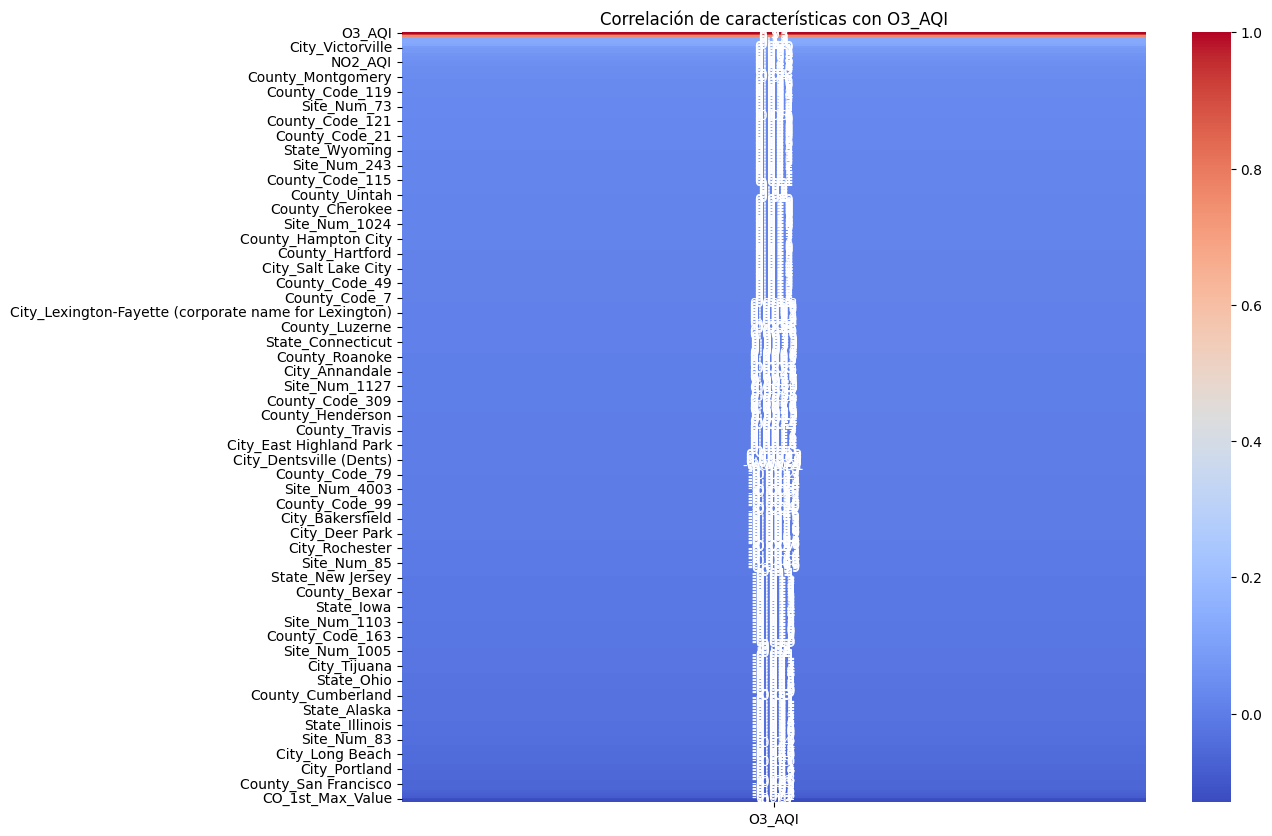

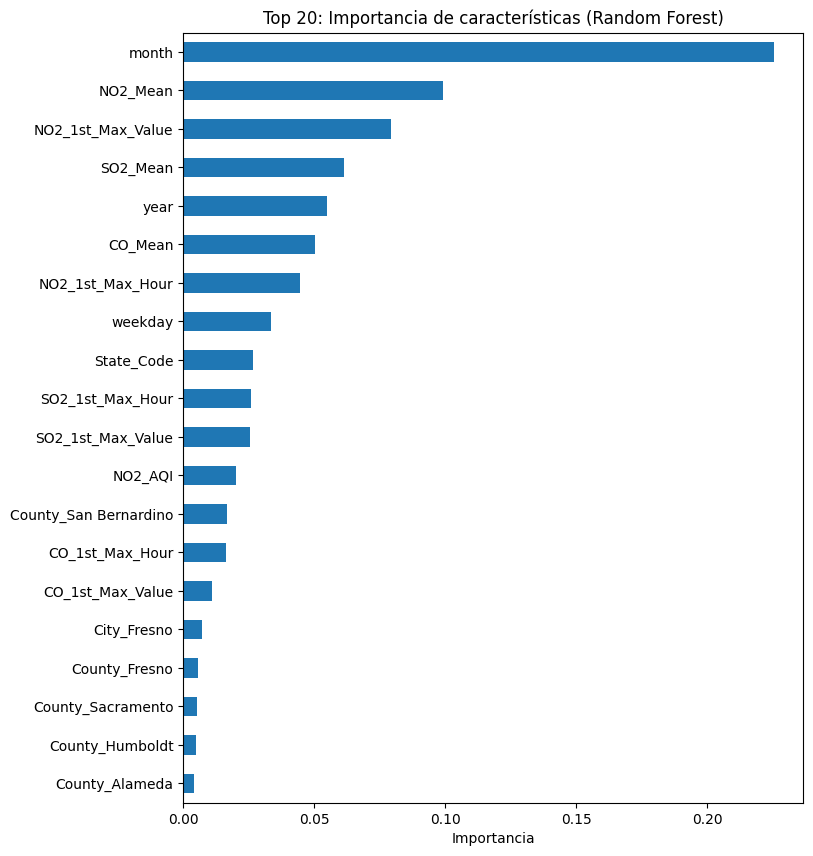

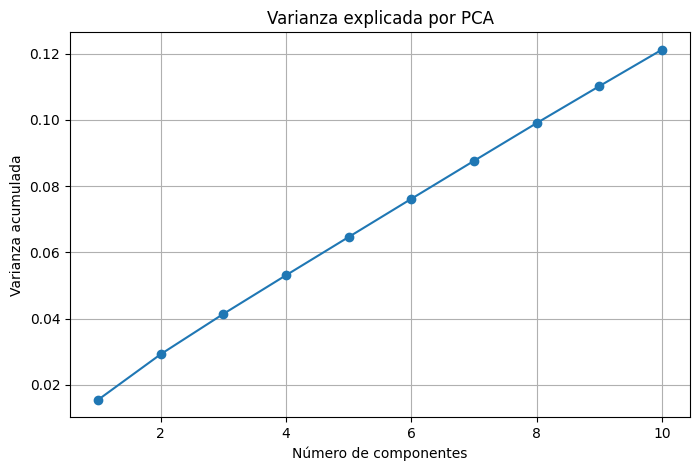

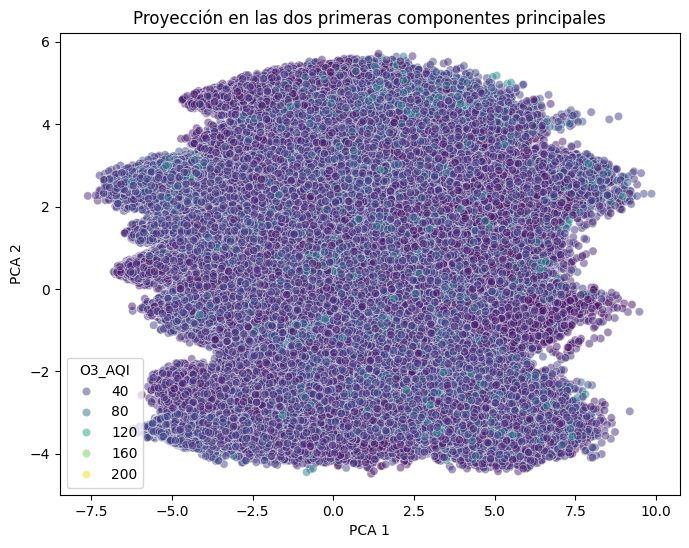

In [ ]:
# --- 1️⃣ Correlación general ---
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix[[target]].sort_values(by=target, ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlación de características con O3_AQI")
plt.show()

# --- 2️⃣ Importancia de variables con RandomForest ---
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(20).plot(kind='barh', figsize=(8, 10))
plt.title("Top 20: Importancia de características (Random Forest)")
plt.xlabel("Importancia")
plt.gca().invert_yaxis()
plt.show()

# --- 3️⃣ PCA para visualizar patrones ---

# Estandarizar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Varianza explicada
explained_var = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_var) + 1), np.cumsum(explained_var), marker='o')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.title('Varianza explicada por PCA')
plt.grid(True)
plt.show()

# --- 4️⃣ Visualización de los dos primeros componentes ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='viridis', alpha=0.5)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Proyección en las dos primeras componentes principales')
plt.legend(title='O3_AQI', loc='best')
plt.show()

Comparación de modelos: Regresión Lineal, Random Forest y LightGBM
En este estudio, se aplicaron tres algoritmos de regresión distintos sobre el mismo conjunto de datos, cuyo objetivo era predecir el índice de calidad del aire basado en ozono (O3_AQI) a partir de variables meteorológicas, contaminantes y características geográficas. Los modelos evaluados fueron: Regresión Lineal, Random Forest y LightGBM (una variante eficiente de los árboles de decisión en gradiente).

1. Regresión Lineal
La regresión lineal se utilizó como modelo base debido a su simplicidad y facilidad de interpretación. A pesar de su naturaleza lineal, logró obtener resultados sorprendentemente buenos con un R² promedio de 0.91 en validación cruzada, lo que indica una relación lineal fuerte entre las variables predictoras y la variable objetivo. Este resultado sugiere que parte de la variabilidad en O3_AQI puede explicarse mediante relaciones lineales simples, lo cual ya es un buen punto de partida.

2. Random Forest
El modelo de Random Forest mostró un ajuste prácticamente perfecto, con un R² de 1.00 en el conjunto de test y valores muy similares en entrenamiento. Esto es indicativo de un modelo extremadamente preciso, pero también levanta preocupaciones sobre sobreajuste (overfitting). Aunque los resultados son impresionantes, es importante recordar que Random Forest puede memorizar patrones complejos, especialmente si no se ajustan adecuadamente hiperparámetros como la profundidad de los árboles o el número de muestras mínimas por hoja. A pesar de esto, la validación cruzada confirmó un rendimiento igualmente alto, lo que sugiere que el modelo está aprendiendo patrones reales en los datos y no solo ruido.

3. LightGBM
LightGBM fue el modelo más eficiente en términos de tiempo de entrenamiento y manejo de características categóricas tras el preprocesamiento adecuado. Este modelo también logró un R² cercano a 1.00 en test y validación cruzada, y ofreció una buena capacidad para interpretar la importancia de las variables. De hecho, las variables más importantes según LightGBM coincidían con las que presentaban mayor correlación con O3_AQI, lo que valida la coherencia del enfoque. Además, se construyó una curva de aprendizaje que evidenció un buen comportamiento del modelo al aumentar el tamaño del conjunto de entrenamiento, sin señales claras de sobreajuste.

Conclusión comparativa
Los tres modelos presentan un rendimiento muy alto en este problema, lo que indica que el dataset posee una alta capacidad predictiva respecto a O3_AQI. Mientras que la regresión lineal proporciona una base interpretativa sólida, los modelos no lineales (Random Forest y LightGBM) capturan relaciones más complejas, logrando mayor precisión. LightGBM se posiciona como el modelo más recomendable por su eficiencia, rendimiento y capacidad de interpretación, siempre que se evite el sobreajuste mediante validación adecuada y control de hiperparámetros.



Regresión Lineal (con regularización Ridge/Lasso/ElasticNet):

alpha: fuerza de la regularización (ej. 0.01 a 100)

tipo de regularización: L1 (Lasso), L2 (Ridge) o ambas (ElasticNet)

Random Forest:

n_estimators: número de árboles (ej. 100, 200)

max_depth: profundidad máxima del árbol (ej. 10, 20, None)

min_samples_split: mínimo número de muestras para dividir un nodo (ej. 2, 5)

min_samples_leaf: mínimo número de muestras en una hoja (ej. 1, 2)

max_features: número de características consideradas en cada división (ej. 'auto', 'sqrt')

LightGBM:

num_leaves: número de hojas por árbol (ej. 31, 50, 100)

learning_rate: tasa de aprendizaje (ej. 0.01, 0.05, 0.1)

n_estimators: número de árboles (ej. 100, 500, 1000)

max_depth: profundidad máxima (ej. -1 para sin límite, 10, 20)

min_data_in_leaf: mínimo número de datos en hoja (ej. 20, 50, 100)

feature_fraction: fracción de características usadas por árbol (ej. 0.6, 0.8, 1.0)

bagging_fraction y bagging_freq: muestreo de datos y frecuencia (ej. 0.6, 0.8, 1.0 y 0, 5, 10)